<a href="https://colab.research.google.com/github/alannasant0s/IBM-exercises/blob/main/analise_campeonato_brasileiro_2003_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Buscando colocar em prática meus estudos em análise de dados, esse notebook possui uma análise de algo que sou apaixonada, o futebol brasileiro. Aqui irei responder algumas perguntas relacionadas ao Campeonato Brasileiro Série A 2003 à 2023**

Campeonato Brasileiro de Futebol Série A

Total 8404 partidas de 2003 à 2023


As quatro fontes de dados empregadas neste projeto são:

campeonato-brasileiro-full.csv: Contém informações cruciais sobre cada partida, como ID, rodada, data, horário, dia da semana, clubes mandante e visitante, formação de ambos os times, técnicos, resultado da partida (vitória, derrota ou empate), arena em que ocorreu o jogo e os placares finais.

campeonato-brasileiro-estatisticas-full.csv: Oferece estatísticas detalhadas dos clubes em cada partida, incluindo chutes, chutes a gol, posse de bola, quantidade e precisão de passes, faltas cometidas, cartões amarelos e vermelhos recebidos, impedimentos e escanteios.

campeonato-brasileiro-gols.csv: Fornece informações específicas sobre cada gol marcado em todas as edições do campeonato, incluindo o atleta responsável, o minuto em que o gol foi feito e o clube ao qual o atleta pertence.

campeonato-brasileiro-cartoes.csv: Detalha os cartões aplicados em cada partida, indicando o clube, o tipo de cartão (amarelo ou vermelho), o atleta punido, o número da camisa do atleta, sua posição na partida e o minuto em que o cartão foi concedido.

Dados disponíveis no Kaggle (https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol)

**Análise Campeonato Brasileiro Série A de 2003 a 2023**



In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


**Carregando os Dados**

In [3]:
# O dataset utilizado é dividido em 4 tabelas. Foi feito o upload para o ambiente do colab e carregamento dos arquivos CSV

df_full = pd.read_csv("/content/campeonato-brasileiro-full.csv")
df_est_full = pd.read_csv("/content/campeonato-brasileiro-estatisticas-full.csv")
df_cartoes = pd.read_csv("/content/campeonato-brasileiro-cartoes.csv")
df_gols = pd.read_csv("/content/campeonato-brasileiro-gols.csv")

**Obtendo as primeiras informações do dataset**

In [4]:
# Analisando os dados brutos das tabelas

print(f"campeonato-brasileiro-full.csv tem {df_full.shape[0]} linhas e {df_full.shape[1]} colunas.")
print(f"campeonato-brasileiro-estatisticas-full.csv tem {df_est_full.shape[0]} linhas e {df_est_full.shape[1]} colunas.")
print(f"campeonato-brasileiro-gols.csv tem {df_gols.shape[0]} linhas e {df_gols.shape[1]} colunas.")
print(f"campeonato-brasileiro-cartoes.csv tem {df_cartoes.shape[0]} linhas e {df_cartoes.shape[1]} colunas.")

campeonato-brasileiro-full.csv tem 8405 linhas e 16 colunas.
campeonato-brasileiro-estatisticas-full.csv tem 16810 linhas e 13 colunas.
campeonato-brasileiro-gols.csv tem 8932 linhas e 6 colunas.
campeonato-brasileiro-cartoes.csv tem 18857 linhas e 8 colunas.


**Visualização inicial dos dados**

In [5]:
df_full.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [6]:
df_est_full.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Coritiba,0,0,NaN,0,NaN,0,0,0,0,0


In [7]:
df_gols.head()

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
1,4607,1,Fluminense,Fred,45,Penalty
2,4607,1,Fluminense,Rafael Sóbis,31,NaN
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4612,1,Cruzeiro,Nílton Ferreira Júnior,63,NaN


In [8]:
df_cartoes.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
2,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
3,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
4,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10


# **Análise Exploratória**

É possível observar que as colunas formacao_mandante, formacao_visitante, tecnico_mandante e tecnico_visitante possuem informações incompletas ou ausentes. Vamos visualizar essas informações

In [9]:
# Contando dados incompletos ou vazios em cada coluna

dados_faltantes_Full = df_full.isna().sum()
dados_faltantes_est = df_est_full.isna().sum()
dados_faltantes_gols = df_gols.isna().sum()
dados_faltantes_cartoes = df_cartoes.isna().sum()

# Criando um DataFrame com as contagens
dados = pd.DataFrame({
    'dados_faltantes_Full': dados_faltantes_Full,
    'dados_faltantes_est': dados_faltantes_est,
    'dados_faltantes_gols': dados_faltantes_gols,
    'dados_faltantes_cartoes': dados_faltantes_cartoes
})

# Colunas específicas que possuem ausências
colunas_especificas = ['dados_faltantes_Full', 'dados_faltantes_est', 'dados_faltantes_gols', 'dados_faltantes_cartoes']

# Contando dados incompletos ou vazios nas colunas específicas
dados_faltantes_especificos = dados[colunas_especificas].sum()

# Filtrando para mostrar apenas as colunas com contagem maior que zero
colunas_com_dados_faltantes = dados_faltantes_especificos[dados_faltantes_especificos > 0]

# Exibindo o resultado
print("Quantidade de dados incompletos ou vazios nas colunas específicas das tabelas:")
print(colunas_com_dados_faltantes)



Quantidade de dados incompletos ou vazios nas colunas específicas das tabelas:
dados_faltantes_Full       19168.0
dados_faltantes_est        18424.0
dados_faltantes_gols        7843.0
dados_faltantes_cartoes     1590.0
dtype: float64



**Notei a existência de diversas lacunas nos dados. No entanto, o que mais chama a atenção é a constatação de que no conjunto de dados "df_est_full", muitas informações ausentes não estão indicadas como "NaN", mas sim como "0". Por exemplo, em algumas partidas, a coluna "passes" possui registros iguais a "0", uma situação altamente improvável. Isso sugere que, em certas colunas desse conjunto de dados, valores "0" foram inseridos em vez de "NaN" para denotar a falta de informações.**

In [10]:
# Em um jogo de futebol, é improvável que ocorram 0 passes. Todas essas linhas serão retiradas por não possuirem informações válidas.
df_est_full[df_est_full.passes == 0]

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Coritiba,0,0,NaN,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,6849,35,Athletico-PR,0,0,None,0,None,0,0,0,0,0
13768,6884,38,Avai,0,0,None,0,None,0,0,0,0,0
13769,6884,38,Athletico-PR,0,0,None,0,None,0,0,0,0,0
14006,7015,13,Vasco,0,0,None,0,None,0,0,0,0,0


In [11]:
# Substituindo as ocorrências de 'None' por 'SEM INFORMAÇÃO' na coluna precisao_passes
df_est_full['precisao_passes'] = df_est_full['precisao_passes'].replace('None', 'SEM INFORMAÇÃO', regex=False)

In [12]:
# Excluindo as linha com valores ausentes
df_est_full = df_est_full[df_est_full.passes != 0]
df_est_full.head(10)

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
9458,4741,13,Flamengo,9,0,65%,509,SEM INFORMAÇÃO,13,1,0,1,5
9459,4741,13,Chapecoense,15,0,35%,280,SEM INFORMAÇÃO,19,4,0,0,8
9594,4808,20,Criciuma,10,0,56%,471,SEM INFORMAÇÃO,17,3,0,1,6
9595,4808,20,Palmeiras,10,0,44%,384,SEM INFORMAÇÃO,18,4,0,1,5
9642,4833,22,Coritiba,9,0,43%,360,SEM INFORMAÇÃO,14,5,0,1,11
9643,4833,22,Sao Paulo,5,0,57%,481,SEM INFORMAÇÃO,10,1,0,3,2
9668,4846,23,Gremio,15,0,42%,357,SEM INFORMAÇÃO,20,2,0,1,9
9669,4846,23,Chapecoense,14,0,58%,477,SEM INFORMAÇÃO,14,4,0,2,4
9682,4853,24,Fluminense,16,0,48%,363,SEM INFORMAÇÃO,17,0,0,1,6
9683,4853,24,Gremio,15,0,52%,383,SEM INFORMAÇÃO,19,0,0,4,6


In [14]:
# Excluindo as linhas com valores ausentes ou nulos na coluna chutes_no_alvo

df_est_full = df_est_full[df_est_full.chutes_no_alvo != 0]
df_est_full.head(10)

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
9976,4989,1,Fluminense,26,11,74%,702,SEM INFORMAÇÃO,9,2,0,1,5
10000,5001,2,Atletico-MG,16,8,54%,466,SEM INFORMAÇÃO,17,2,0,1,7
10001,5001,2,Fluminense,8,2,46%,411,SEM INFORMAÇÃO,9,1,0,2,0
10024,5013,3,Fluminense,15,4,42%,355,SEM INFORMAÇÃO,19,2,0,2,9
10025,5013,3,Corinthians,7,2,58%,500,SEM INFORMAÇÃO,6,2,0,3,6
10048,5025,4,Fluminense,7,2,33%,253,SEM INFORMAÇÃO,23,3,1,0,1
10049,5025,4,Flamengo,15,5,67%,475,SEM INFORMAÇÃO,24,5,1,1,8
10066,5034,5,Fluminense,12,6,53%,451,SEM INFORMAÇÃO,13,1,0,1,3
10067,5034,5,Coritiba,8,4,47%,414,SEM INFORMAÇÃO,24,4,0,3,4
10088,5046,6,Fluminense,15,4,47%,408,SEM INFORMAÇÃO,12,3,0,3,7


**Verificando se as tabelas possuem duplicatas**

In [15]:
df_full[df_full.duplicated()]

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado


In [16]:
df_est_full[df_est_full.duplicated()]

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios


In [17]:
df_gols[df_gols.duplicated()]

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol


In [18]:
df_cartoes[df_cartoes.duplicated()]

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto


**Após a análise, foi possível constatar que não possuem duplicatas.**

# **Pré-Processamento dos Dados**




In [19]:
# Padronizando o nomes das colunas

df_full.rename(columns={'ID': 'partida_id'}, inplace=True)

In [20]:
# Corrigindo as informações incorretas

df_full.rename(columns={'rodata': 'rodada'}, inplace=True)
df_est_full.rename(columns={'rodata': 'rodada'}, inplace=True)
df_gols.rename(columns={'rodata': 'rodada'}, inplace=True)
df_cartoes.rename(columns={'rodata': 'rodada'}, inplace=True)

# **Covertendo e ajustando**



In [21]:
df_full.dtypes

partida_id             int64
rodada                 int64
data                  object
hora                  object
mandante              object
visitante             object
formacao_mandante     object
formacao_visitante    object
tecnico_mandante      object
tecnico_visitante     object
vencedor              object
arena                 object
mandante_Placar        int64
visitante_Placar       int64
mandante_Estado       object
visitante_Estado      object
dtype: object

In [22]:
# Conversão da coluna de datas para o tipo datetime

df_full['data'] = pd.to_datetime(df_full['data'], format='%d/%m/%Y')


In [23]:
# Padronizando a coluna vencedor

df_full['vencedor'].replace('-', 'Empate', inplace=True)

In [24]:
df_est_full.dtypes

partida_id          int64
rodada              int64
clube              object
chutes              int64
chutes_no_alvo      int64
posse_de_bola      object
passes              int64
precisao_passes    object
faltas              int64
cartao_amarelo      int64
cartao_vermelho     int64
impedimentos        int64
escanteios          int64
dtype: object

In [25]:
# Conversão da coluna de posse_de_bola para o tipo inteiro

df_est_full['posse_de_bola'] = df_est_full['posse_de_bola'].str[:2].astype(int)

# **Respondendo as perguntas**

**1 - Quais os 10 times com mais vitórias, derrotas e empates no campeonato brasileiro série A no período de 2003 à 2023?**

# **Analisando o desempenho das equipes:**

**Vitórias por time:**

In [26]:
vitorias_por_time = df_full['vencedor'].value_counts()

**Empates por time:**

In [27]:
# Contabilizando os empates, somando tanto os empates como mandante quanto como visitante

empates_mandante = df_full['mandante'][df_full['vencedor'] == 'Empate'].value_counts()
empates_visitante = df_full['visitante'][df_full['vencedor'] == 'Empate'].value_counts()
empates_por_time = pd.concat([empates_mandante, empates_visitante], axis=1).sum(axis=1).sort_values(ascending=False)


**Derrotas por time:**

In [28]:
# Contabilizando as derrotas, considerando tanto as derrotas como mandante quanto como visitante

derrotas_mandante = df_full['mandante'][df_full['vencedor'] == df_full['visitante']].value_counts()
derrotas_visitante = df_full['visitante'][df_full['vencedor'] == df_full['mandante']].value_counts()
derrotas_por_time = pd.concat([derrotas_mandante, derrotas_visitante], axis=1).sum(axis=1).sort_values(ascending=False)


**Essas análises fornecem insights sobre o desempenho das equipes, destacando o número de vitórias, empates e derrotas em suas partidas.**

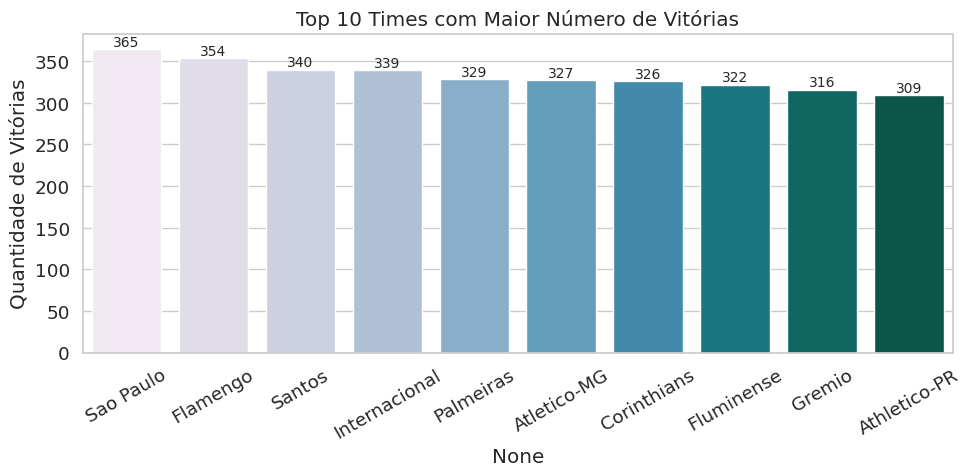

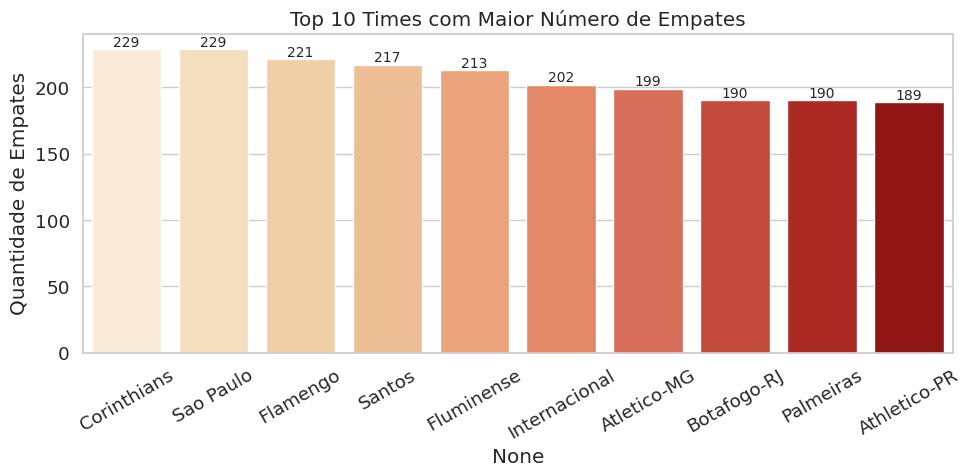

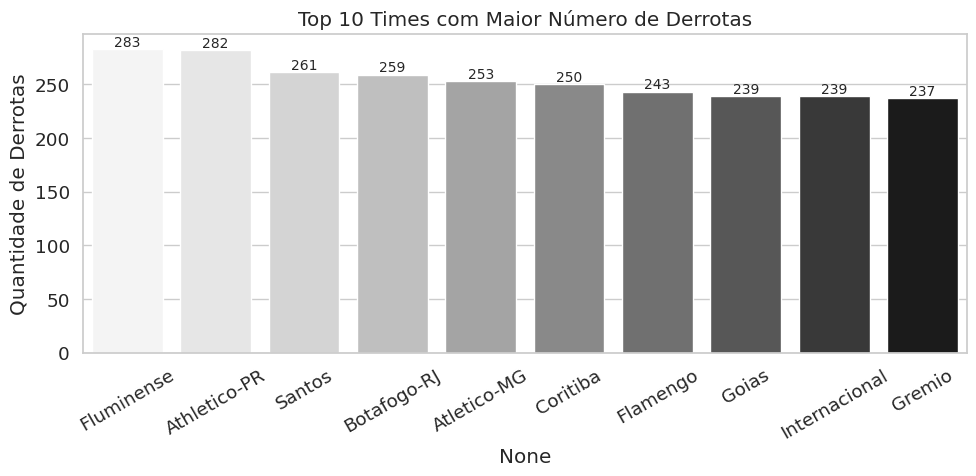

In [29]:
# Personalizando o estilo dos gráficos
sns.set(style="whitegrid", font_scale=1.2)

# Gráfico dos 10 principais times com mais vitórias
top_10_vitorias = vitorias_por_time[1:11]
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_vitorias.index, y=top_10_vitorias.values, hue=top_10_vitorias.index, palette="PuBuGn", dodge=False)
plt.ylabel('Quantidade de Vitórias')
plt.title('Top 10 Times com Maior Número de Vitórias')
plt.xticks(rotation=30)

# Adicionando rótulos com a contagem no topo de cada barra
for index, value in enumerate(top_10_vitorias.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Finalizando a apresentação do gráfico
plt.tight_layout()
plt.show()

# Gráfico dos 10 principais times com mais empates
top_10_empates = empates_por_time[0:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_empates.index, y=top_10_empates.values, hue=top_10_empates.index, palette="OrRd", dodge=False)
plt.ylabel('Quantidade de Empates')
plt.title('Top 10 Times com Maior Número de Empates')
plt.xticks(rotation=30)

# Adicionando rótulos com a contagem no topo de cada barra
for index, value in enumerate(top_10_empates.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Finalizando a apresentação do gráfico
plt.tight_layout()
plt.show()

# Gráfico dos 10 principais times com mais derrotas
top_10_derrotas = derrotas_por_time[0:10]
plt.figure(figsize=(10, 5))
ax3 = sns.barplot(x=top_10_derrotas.index, y=top_10_derrotas.values, hue=top_10_derrotas.index, palette="Greys", dodge=False)
plt.ylabel('Quantidade de Derrotas')
plt.title('Top 10 Times com Maior Número de Derrotas')
plt.xticks(rotation=30)

# Adicionando rótulos com a contagem no topo de cada barra
for index, value in enumerate(top_10_derrotas.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Finalizando a apresentação do gráfico
plt.tight_layout()
plt.show()




# **2 - Quais são os 10 melhores mandantes e os 10 melhores visitantes no período 2003-2023?**

In [30]:
# Calculando os 10 melhores times em seus jogos como mandantes
mandantes = ((((df_full['mandante'][df_full['vencedor'] == df_full['mandante']].value_counts() * 3)
               + df_full['mandante'][df_full['vencedor'] == 'Empate'].value_counts())
              / (df_full['mandante'].value_counts() * 3)) * 100).sort_values(ascending=False)[:10]

# Calculando os 10 melhores times em seus jogos como visitantes
visitantes = ((((df_full['visitante'][df_full['vencedor'] == df_full['visitante']].value_counts() * 3)
               + df_full['visitante'][df_full['vencedor'] == 'Empate'].value_counts())
              / (df_full['visitante'].value_counts() * 3)) * 100).sort_values(ascending=False)[:10]

# Arredondando o valor para duas casas decimais e adicionando o símbolo de porcentagem (%)
mandantes = mandantes.round(2)
visitantes = visitantes.round(2)


**GRÁFICO TOP 10 TIMES MANDANTES**

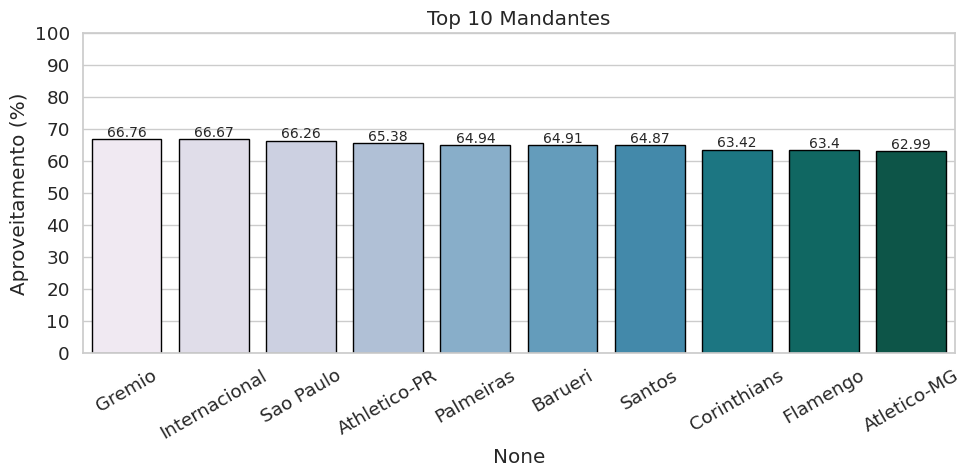

In [31]:
# Gráfico dos 10 melhores mandantes
plt.figure(figsize=(10, 5))
sns.barplot(x=mandantes.index, y=mandantes.values, hue=mandantes.index, palette="PuBuGn", linewidth=1, edgecolor='black', dodge=False)
plt.ylabel('Aproveitamento (%)')
plt.title('Top 10 Mandantes')
plt.xticks(rotation=30)

# Definir os ticks do eixo y para serem exibidos em intervalos de 10 em 10
plt.yticks(range(0, 101, 10))

# Adicionando a legenda com o número de Y em cada barra
for index, value in enumerate(mandantes.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Ajustando a figura
plt.tight_layout()
plt.show()

**GRÁFICO TOP 10 TIMES VISITANTES**

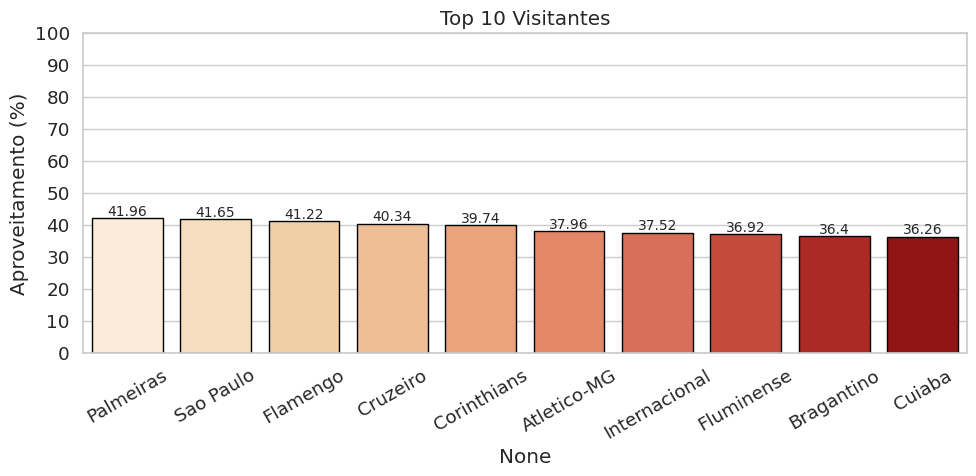

In [32]:
# Gráfico dos 10 melhores visitantes
plt.figure(figsize=(10, 5))
sns.barplot(x=visitantes.index, y=visitantes.values, hue=visitantes.index, palette="OrRd", linewidth=1, edgecolor='black', dodge=False)
plt.ylabel('Aproveitamento (%)')
plt.title('Top 10 Visitantes')
plt.xticks(rotation=30)

# Definir os ticks do eixo y para serem exibidos em intervalos de 10 em 10
plt.yticks(range(0, 101, 10))

# Adicionando a legenda com o número de Y em cada barra
for index, value in enumerate(visitantes.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Ajustando a figura
plt.tight_layout()
plt.show()

# **3 - Quais foram os 20 melhores times dos ultimos 20 anos?**

In [33]:
# Criando a tabela

df_tabela = pd.DataFrame(columns=['Time', 'Partidas Jogadas', 'Vitórias', 'Empates', 'Derrotas', 'Pontos', 'Aproveitamento'])

In [34]:
# Calculando o número de pontos para cada time (soma das vitórias e empates)

pontos_por_time = ((vitorias_por_time * 3) + empates_por_time).sort_values(ascending=False)

In [35]:
# Inserindo na tabela as informações sobre os 20 melhores times

df_tabela['Time'] = pontos_por_time.index[:20]
df_tabela['Pontos'] = pontos_por_time.values[:20].astype(int)
df_tabela['Vitórias'] = df_tabela['Time'].map(vitorias_por_time)
df_tabela['Empates'] = df_tabela['Time'].map(empates_por_time)
df_tabela['Derrotas'] = df_tabela['Time'].map(derrotas_por_time)
df_tabela['Partidas Jogadas'] = df_tabela['Vitórias'] + df_tabela['Empates'] + df_tabela['Derrotas']

# Calculando o aproveitamento
df_tabela['Aproveitamento'] = ((df_tabela['Vitórias'] * 3 + df_tabela['Empates']) /
                               ((df_tabela['Vitórias'] + df_tabela['Empates'] + df_tabela['Derrotas']) * 3)) * 100

# Arredondando o valor para duas casas decimais e adicionando o símbolo de porcentagem (%)

df_tabela['Aproveitamento'] = df_tabela['Aproveitamento'].round(2).astype(str) + '%'




In [36]:
# Ajustando a tabela para ficar top

df_tabela.index = range(1, len(df_tabela) + 1)
df_tabela

,Time,Partidas Jogadas,Vitórias,Empates,Derrotas,Pontos,Aproveitamento
1,Sao Paulo,818,365,229,224,1324,53.95%
2,Flamengo,818,354,221,243,1283,52.28%
3,Santos,818,340,217,261,1237,50.41%
4,Internacional,780,339,202,239,1219,52.09%
5,Corinthians,780,326,229,225,1207,51.58%
6,Atletico-MG,779,327,199,253,1180,50.49%
7,Fluminense,818,322,213,283,1179,48.04%
8,Palmeiras,734,329,190,215,1177,53.45%
9,Gremio,738,316,185,237,1133,51.17%
10,Athletico-PR,780,309,189,282,1116,47.69%


# **Qual foi o top 10 artilheiros no período 2014 - 2023?**

In [37]:
# Descobrindo o top 10 artilheiros

top_artilheiros = df_gols['atleta'].value_counts()[:10]

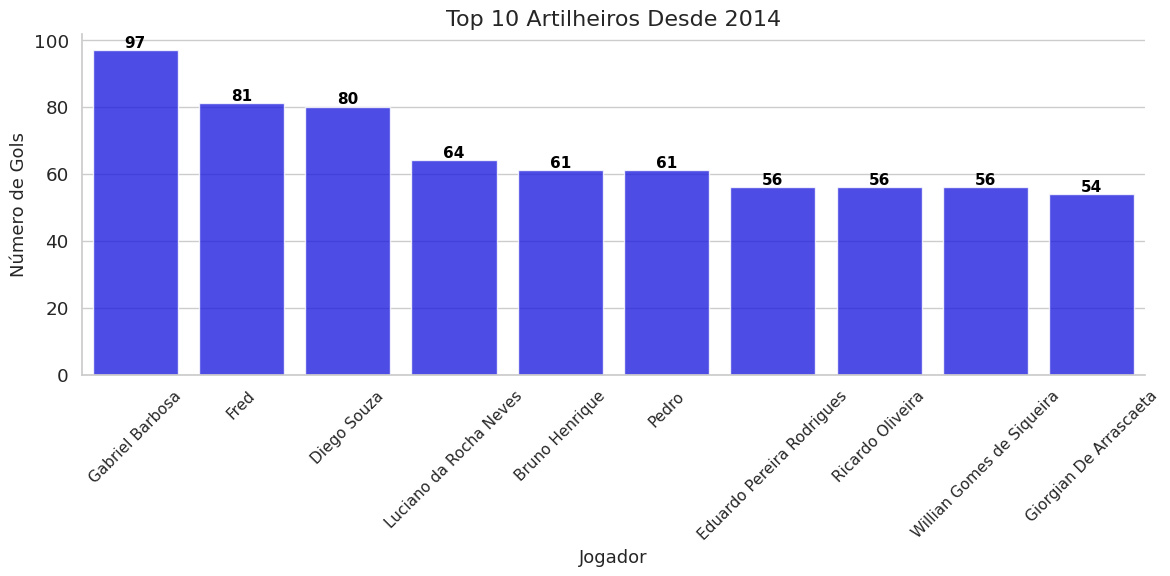

In [38]:
# Configurando o gráfico de barras dos top 10 artilheiros

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artilheiros.index, y=top_artilheiros.values, alpha=0.8, color='blue')
plt.xlabel('Jogador', fontsize=13)
plt.ylabel('Número de Gols', fontsize=13)
plt.title('Top 10 Artilheiros Desde 2014', fontsize=16)
plt.xticks(rotation=45, ha='center', fontsize=11)
plt.gca().spines['right'].set_visible(False)  # Removendo borda direita
plt.gca().spines['top'].set_visible(False)  # Removendo borda superior

# Adicionando anotações com os valores de cada barra

for i, value in enumerate(top_artilheiros.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=11, weight='bold', color='black')

plt.tight_layout()
plt.show()





# **4 - Quais foram os cinco jogadores que mais foram punidos com cartões amarelos e os cinco jogadores que mais receberam cartões vermelhos no período 2014-2023?**

In [39]:
# Filtrando os registros relacionados aos cartões amarelos

cartoes_amarelos = df_cartoes[df_cartoes['cartao'] == 'Amarelo']

# Filtrando os registros relacionados aos cartões vermelhos

cartoes_vermelhos = df_cartoes[df_cartoes['cartao'] == 'Vermelho']

# Agrupando por jogador e contabilizando a quantidade de cartões amarelos recebidos por cada jogador

jogadores_amarelos = cartoes_amarelos.groupby('atleta')['cartao'].count().reset_index()

# Agrupando por jogador e contabilizando a quantidade de cartões vermelhos recebidos por cada jogador

jogadores_vermelhos = cartoes_vermelhos.groupby('atleta')['cartao'].count().reset_index()

# Renomeando a coluna de contagem para "cartoes_amarelos" no DataFrame de amarelos

jogadores_amarelos.rename(columns={'cartao': 'cartoes_amarelos'}, inplace=True)

# Renomeando a coluna de contagem para "cartoes_vermelhos" no DataFrame de vermelhos

jogadores_vermelhos.rename(columns={'cartao': 'cartoes_vermelhos'}, inplace=True)

# Ordenando em ordem decrescente e obtendo os cinco jogadores com mais cartões amarelos

top_5_amarelos = jogadores_amarelos.sort_values(by='cartoes_amarelos', ascending=False)[:5]

# Ordenando em ordem decrescente e obtendo os cinco jogadores com mais cartões vermelhos

top_5_vermelhos = jogadores_vermelhos.sort_values(by='cartoes_vermelhos', ascending=False)[:5]


**GRÁFICO CARTÕES AMARELOS**

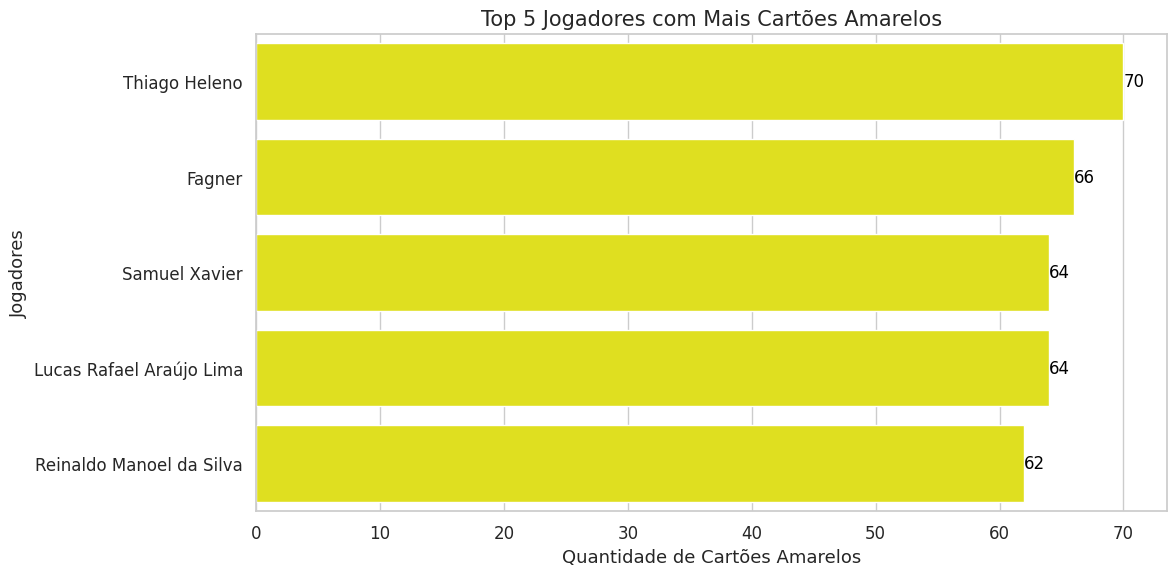

In [40]:
# Criando o gráfico de barras para os cartões amarelos

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_amarelos['cartoes_amarelos'], y=top_5_amarelos['atleta'], color='yellow')
plt.xlabel('Quantidade de Cartões Amarelos', fontsize=13)
plt.ylabel('Jogadores', fontsize=13)
plt.title('Top 5 Jogadores com Mais Cartões Amarelos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionando valores nas barras

for index, value in enumerate(top_5_amarelos['cartoes_amarelos']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


**GRÁFICO CARTÕES VERMELHOS**

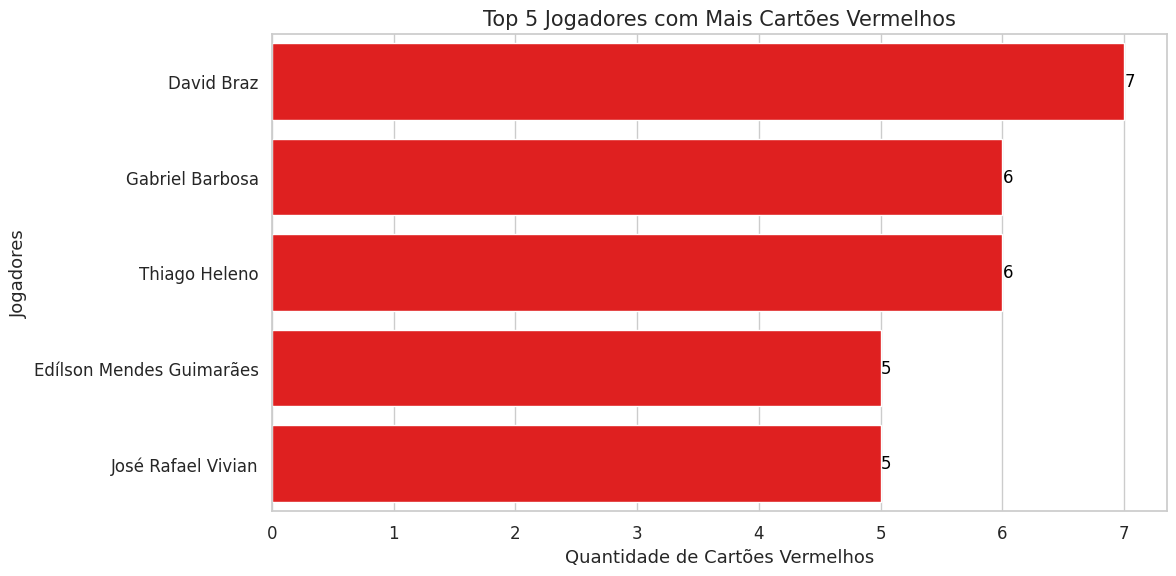

In [41]:
# Criando o gráfico de barras para os cartões vermelhos

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_vermelhos['cartoes_vermelhos'], y=top_5_vermelhos['atleta'], color='red')
plt.xlabel('Quantidade de Cartões Vermelhos', fontsize=13)
plt.ylabel('Jogadores', fontsize=13)
plt.title('Top 5 Jogadores com Mais Cartões Vermelhos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionando valores nas barras

for index, value in enumerate(top_5_vermelhos['cartoes_vermelhos']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# **Considerações Finais**

Esta análise dos dados do Campeonato Brasileiro de futebol de 2003 a 2023 revelou insights importantes sobre os fatores que impactam o desempenho de cada equipe nas temporadas examinadas. A seguir, destacamos alguns pontos levantados durante o estudo.

Domínio do São Paulo: O São Paulo destaca-se como o clube com a pontuação geral mais alta, abrangendo tanto as performances em casa quanto como visitante.

Desempenho de Palmeiras e Corinthians: Ambos os clubes conquistaram o maior número de títulos entre 2003 e 2023. O Palmeiras possui o maior percentual de vitórias, enquanto o Corinthians ocupa a oitava posição nesse critério, revelando comportamentos distintos em vitórias, derrotas e empates.


Alanna Santos